In [0]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import pandas as pd
import numpy as np
import nltk


In [4]:
try:
  from nltk.corpus import stopwords
except Exception as e:
  print(e)
  print("Please ensure that you are connected to the internet while the package is being downloaded")

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
plt.rcParams.update({'font.size': 20})

In [0]:
tweets = open('tweets_corona.txt',encoding='utf8').readlines()
backup = tweets.copy()

In [0]:
tweets = [re.sub("(\\n)"," ",t) for t in tweets]

In [0]:
tweets = [re.sub("(\s\d+\s)"," ",t) for t in tweets]

In [0]:
tweets = [re.sub('https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+/\w+'," ",t).strip() for t in tweets]

In [0]:
with_symbols = tweets.copy()

In [0]:
tweets = tweets = [re.sub("\W+"," ",t) for t in tweets]

In [0]:
stop_words = set(stopwords.words('english'))

In [0]:
wordcloud = WordCloud(collocations=False,random_state=2020).generate(" ".join([t for t in tweets]))

In [0]:
hashtags = [re.findall("^#\w+$",with_symbols_) for with_symbols_ in with_symbols]

In [0]:
h_ = []
for i in hashtags:
  if i!=[]:
    h_.append(i)

In [0]:
hashtags = h_

In [0]:
h_ = []
for i in range(len(hashtags)):
  h_.append(hashtags[i][0])

In [0]:
hashtags_data=pd.DataFrame()

In [0]:
hashtags_data['Tags'] = h_

In [0]:
max_hashtags = hashtags_data['Tags'].value_counts().index.tolist()[0]

In [0]:
handles = [re.findall("^@\w+_?\w+$",with_symbols_) for with_symbols_ in with_symbols]

In [0]:
h_ = []
for i in handles:
  if i!=[]:
    h_.append(i)

In [0]:
handles = h_

In [0]:
h_ = []
for i in range(len(handles)):
  h_.append(handles[i][0])

In [0]:
handles_data=pd.DataFrame()

In [0]:
handles_data['Handles'] = h_

In [0]:
max_handles = handles_data['Handles'].value_counts().index.tolist()[0]

**Solutions**

---
# WORDCLOUD

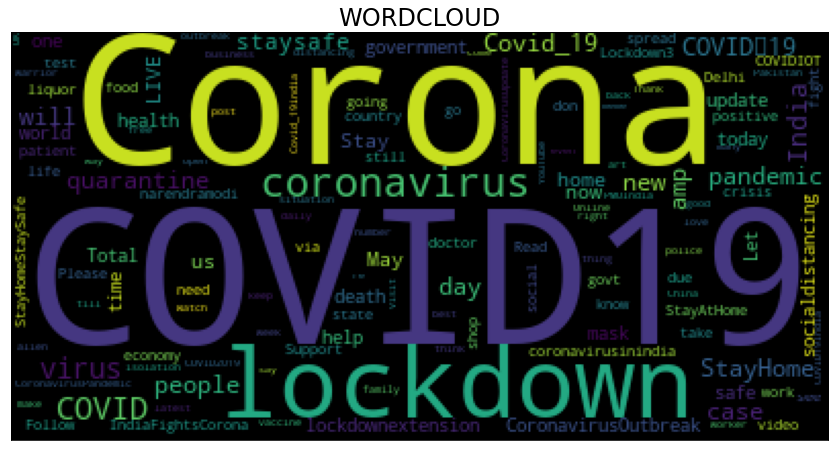

In [28]:
plt.figure(figsize=(12,9))
plt.imshow(wordcloud)
plt.xticks([])
plt.yticks([])
plt.title("WORDCLOUD")
plt.tight_layout()
plt.show()

In [29]:
print("Most used Handle is : {}".format(max_handles))

Most used Handle is : @PMOIndia


# Analysis of Hashtags and Handles

In [0]:
#Plotting top 5 hashtags and handles
hashtags_index = hashtags_data.Tags.value_counts().index.tolist()[0:5]
hashtags_tags = hashtags_data.Tags.value_counts().tolist()[0:5]

handles_index = handles_data.Handles.value_counts().index.tolist()[0:10]
handles_value = handles_data.Handles.value_counts().tolist()[0:10]

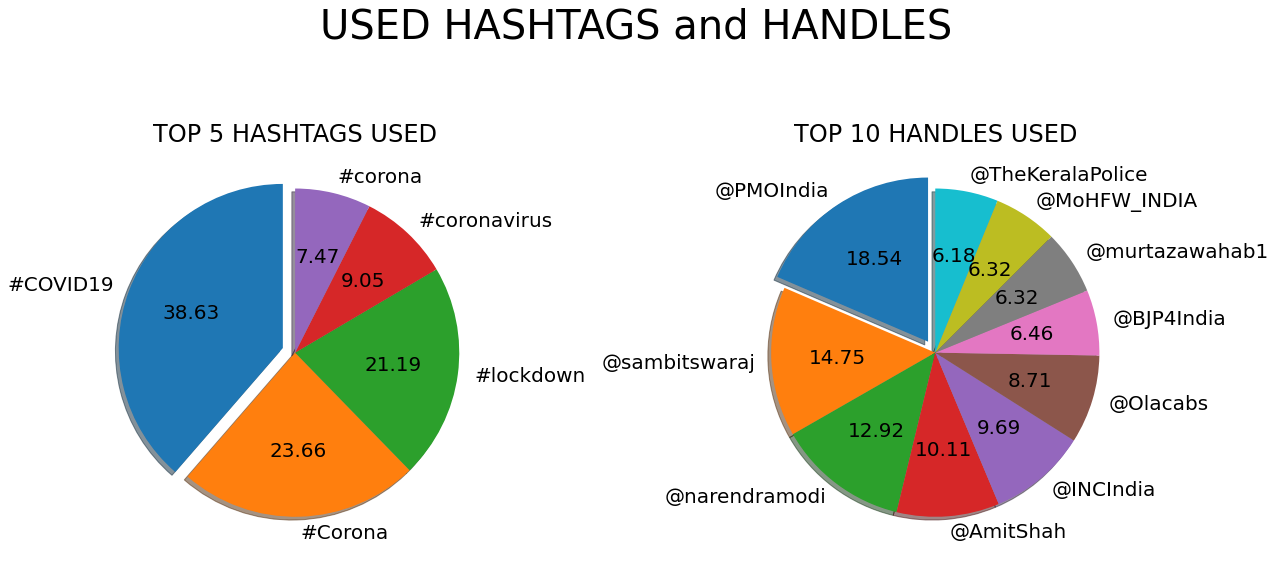

In [31]:
f = plt.figure(figsize=(18,10))
f.suptitle('USED HASHTAGS and HANDLES',fontsize=40)
explode = (0.08,0,0,0,0)
explode_ = (0.08,0,0,0,0,0,0,0,0,0)

ax = f.add_subplot(121)
ax.pie(hashtags_tags, labels=hashtags_index, autopct='%.2f', explode = explode, shadow=True,startangle=90)
plt.gca().set_title("TOP 5 HASHTAGS USED")

ax = f.add_subplot(122)
ax.pie(handles_value, labels=handles_index, autopct='%.2f',explode = explode_, shadow=True,startangle=90)
plt.gca().set_title("TOP 10 HANDLES USED")


plt.tight_layout()
plt.show()

In [32]:
print("Most used Hashtag is : {} with a count of {}".format(max_hashtags,hashtags_tags[0]))
print("Most used Handle is : {} with a count of {}".format(max_handles,handles_value[0]))

Most used Hashtag is : #COVID19 with a count of 1737
Most used Handle is : @PMOIndia with a count of 132


In [33]:
print('Top 10 Handles are :')
print(handles_index)

Top 10 Handles are :
['@PMOIndia', '@sambitswaraj', '@narendramodi', '@AmitShah', '@INCIndia', '@Olacabs', '@BJP4India', '@murtazawahab1', '@MoHFW_INDIA', '@TheKeralaPolice']
